In [2]:
# next I need to make a plot for one or two example binaries
# where I fit a single star, and a binary, and also compute the training set density
%pylab inline
import pandas as pd
from binary_model import *

binary_flux_df = pd.read_csv('./data/gaia_rvs_dataframes/galah_binaries_flux.csv')
binary_sigma_df = pd.read_csv('./data/gaia_rvs_dataframes/galah_binaries_sigma.csv')
binary_label_df = pd.read_csv('./data/galah_label_dataframes/galah_binaries_labels.csv')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [5]:
test_flux_df = pd.read_csv('./data/gaia_rvs_dataframes/test_flux.csv')
test_sigma_df = pd.read_csv('./data/gaia_rvs_dataframes/test_sigma.csv')
test_label_df = pd.read_csv('./data/galah_label_dataframes/test_labels.csv')

for source_id in test_flux_df.columns[1:]:
    flux = test_flux_df[source_id]
    sigma = test_sigma_df[source_id]

    # fit a binary and secondary to the data
    single_fit_labels, single_fit_chi2 = fit_single_star(flux, sigma)
    single_fit  = single_star_model(single_fit_labels)

    binary_fit_labels, binary_fit_chi2 = fit_binary(flux, sigma)
    primary_fit_labels = binary_fit_labels[:6]
    secondary_fit_labels = binary_fit_labels[6:]
    binary_fit = binary_model(
            primary_fit_labels, 
            secondary_fit_labels)
    if single_fit_chi2 - binary_fit_chi2<100:
        print(source_id, single_fit_chi2 - binary_fit_chi2)

650983730585278464 36.32118124454291
4238312283632420864 1.9381193865579007
6772521384023709696 -644.9195793218851
4113217031812749312 41.6277056061208
6764884622931136512 21.31740726351427
5602874417769917952 45.26700384640162
4766675483878003200 13.398599934461345
5371698627700400640 24.91861227010304
5820378880278667776 43.3122596856706
5791140357826207232 44.82727365167466
6084549227583639424 46.17162012903691
4678709399694626432 15.977516725681198
4115019509362995840 35.92343799790979
5907581624198902400 73.81750728024781
4247141946113824128 41.71447666168797
5230251438947460352 25.519304171074964
3311026748465661440 68.60427232229449
2552936192899909120 36.50003524870681
4675892897582175616 18.82056871179384
4325315470492415616 30.819925078731103
5707423194583926272 62.04005219303508
5370910209148029440 42.72469844029729
3305461226765470720 5.840463187733803
4628004561986476928 2.5663596611775574
68310561489710336 32.64839769802575
5040641758243007744 74.89141242689038
5367458120

In [9]:
training_label_df = pd.read_csv('./data/galah_label_dataframes/training_labels.csv')
5290699220986252672 in training_label_df.source_id.to_numpy()

True

In [2]:
for binary_source_id in binary_flux_df.columns[1:]:
    binary_flux = binary_flux_df[binary_source_id]
    binary_sigma = binary_sigma_df[binary_source_id]

    # fit a binary and secondary to the data
    single_fit_labels, single_fit_chi2 = fit_single_star(binary_flux, binary_sigma)
    single_fit  = single_star_model(single_fit_labels)

    binary_fit_labels, binary_fit_chi2 = fit_binary(binary_flux, binary_sigma)
    primary_fit_labels = binary_fit_labels[:6]
    secondary_fit_labels = binary_fit_labels[6:]
    binary_fit = binary_model(
            primary_fit_labels, 
            secondary_fit_labels)
    if single_fit_chi2 - binary_fit_chi2>500:
        print(binary_source_id, single_fit_chi2 - binary_fit_chi2)

# I think I need the bottom 2 panels
# and also the training set density panels


3236718965225515520 511.7740354073112
657990986908447488 701.7233019076625
2938177167172646016 617.0338894653391
6045878952655244416 716.5490725399977
6048976762246802944 2081.1384760188957
3305592171726977408 1187.2483338493275
5647906359594682240 1061.6565124260778
66503449709270400 3031.1908498624107
652271808458351360 650.2606920148628
6125777546372427904 1126.42745296068
661331131435476608 567.1086999554882
4060110409716207232 1114.8380626684225
5277004013388909184 612.4172636832345
6101033170325458560 1075.5640245164714
2904612989883810304 556.2217337170773
153768354707949056 1269.8300701239073
5283647812401434112 796.1593501867956
5284117471362829056 1172.684382176224
5661962786822241536 1180.582092342543
6708384225076201344 2516.11643589867
5459996760091938560 1230.3870394682217
5367424413685522688 1250.1653155304475
6129813922282217216 500.7334479486585
6235138683716978432 671.9124035280183
3309970392669539200 1256.5440021442382
4860814260698766464 560.5326102317149
5419552053

In [11]:
binary_source_id = '153768354707949056'
# binary_source_id = '5661962786822241536'
binary_flux = binary_flux_df[binary_source_id]
binary_sigma = binary_sigma_df[binary_source_id]

# fit a binary and secondary to the data
single_fit_labels, single_fit_chi2 = fit_single_star(binary_flux, binary_sigma)
single_fit  = single_star_model(single_fit_labels)

binary_fit_labels, binary_fit_chi2 = fit_binary(binary_flux, binary_sigma)
primary_fit_labels = binary_fit_labels[:6]
secondary_fit_labels = binary_fit_labels[6:]
binary_fit = binary_model(
        primary_fit_labels, 
        secondary_fit_labels)

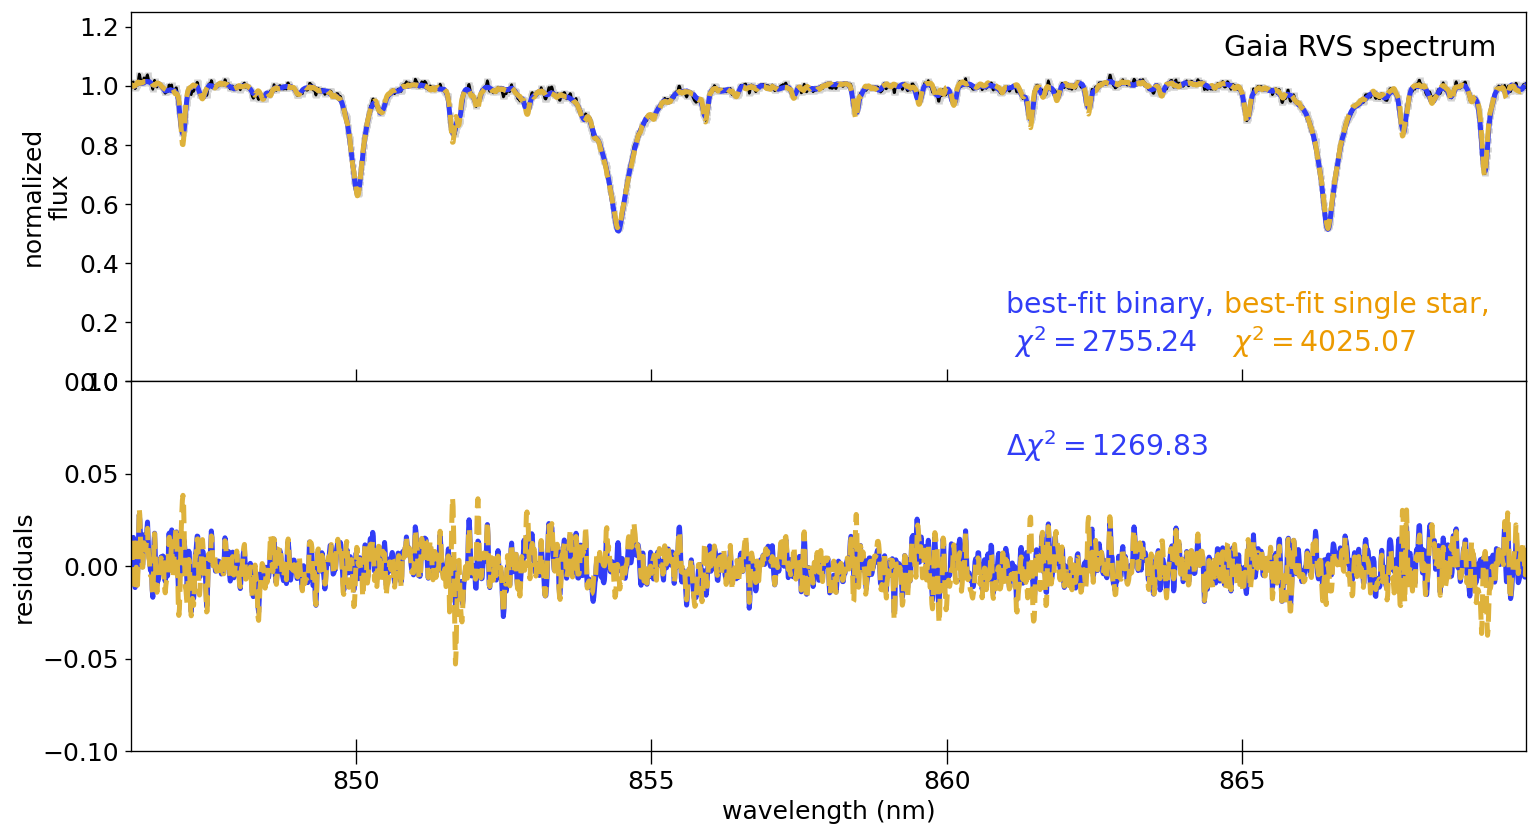

In [12]:
primary_color='#91A8D6'
secondary_color='#B03838'
single_fit_color='#DEB23C'
binary_fit_color = '#313DF7'

rcParams['font.size']=15
figure(figsize=(15,8))
subplot(211);xlim(w.min(), w.max());ylim(0,1.25)
errorbar(w, binary_flux, yerr=binary_sigma, color='k', ecolor='lightgrey', elinewidth=4, zorder=0)
plot(w, binary_fit, color=binary_fit_color, lw=3)
plot(w, single_fit, color=single_fit_color, ls='--', lw=3)
# text(862,1.1,'Gaia DR3 {}'.format(binary_source_id), color='dimgrey', fontsize=15)
text(864.7,1.1,'Gaia RVS spectrum'.format(binary_source_id), color='k', fontsize=17)
text(864.7,0.1,'best-fit single star, \n $\chi^2={}$'.format(np.round(single_fit_chi2,2)),
     color='#EC9A00', fontsize=17)
text(861,0.1,'best-fit binary, \n $\chi^2={}$'.format(np.round(binary_fit_chi2,2)),
     color=binary_fit_color, fontsize=17)
tick_params(axis='x', direction='inout', length=15)
ylabel('normalized\nflux')

subplot(212);xlim(w.min(), w.max());ylim(-0.1,0.1)
plot(w, binary_flux - binary_fit, color=binary_fit_color, lw=3)
plot(w, binary_flux - single_fit, color=single_fit_color, ls='--', lw=3)
text(861,0.06,'$\Delta\chi^2={}$'.format(np.round(single_fit_chi2-binary_fit_chi2,2)),
     color=binary_fit_color, fontsize=17)
tick_params(axis='x', direction='inout', length=15)
xlabel('wavelength (nm)')
ylabel('residuals')

subplots_adjust(hspace=0)

Text(0, 0.5, 'v$_{\\rm broad}$ (km/s)')

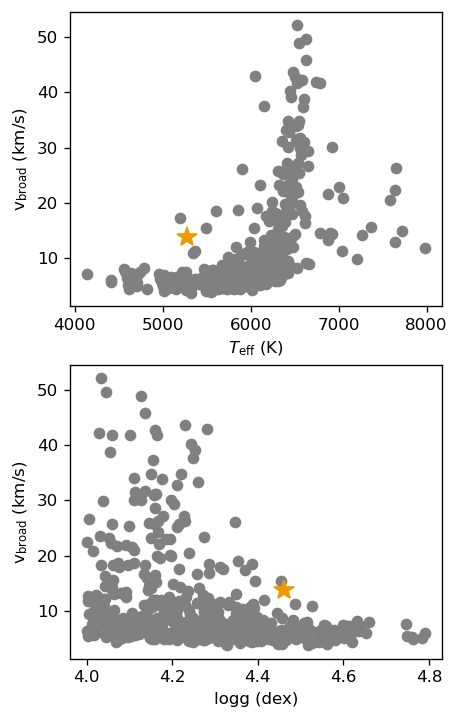

In [13]:
training_labels = pd.read_csv('./data/galah_label_dataframes/training_labels.csv')
rcParams['figure.dpi']=120
rcParams['font.size']=10
figure(figsize=(4,7))
subplot(211)
plot(training_labels.galah_teff, training_labels.galah_vbroad, 'o', color='grey')
plot(single_fit_labels[0], single_fit_labels[-1], '*', 
     color='#EC9A00', markersize=12)
xlabel(r'$T_{\rm eff}$ (K)');ylabel(r'v$_{\rm broad}$ (km/s)')
subplot(212)
plot(training_labels.galah_logg, training_labels.galah_vbroad, 'o', color='grey')
plot(single_fit_labels[1], single_fit_labels[-1], '*', 
     color='#EC9A00', markersize=12)
xlabel('logg (dex)');ylabel(r'v$_{\rm broad}$ (km/s)')

In [14]:
training_set_density(single_fit_labels)

2.688

In [7]:
# I can show 2 binaries!
binary_label_df[binary_label_df.source_id==int(binary_source_id)]

,Unnamed: 0,DESIGNATION,sobject_id,source_id,galah_teff,galah_eteff,galah_logg,galah_elogg,galah_feh,galah_efeh,...,galah_logg2,galah_vbroad2,galah_rv1,galah_rv2,galah_r1,galah_r2,galah_fluxratio,rvs_spec_sig_to_noise,ra,dec
106,106,Gaia DR3 5661962786822241536,170407002601118,5661962786822241536,6066.553,72.946959,3.965954,0.180131,-0.308831,0.055068,...,4.63,14.8857,1.8469,-42.2831,1.41,1.12,0.63638,57.75781,143.515523,-24.622215


NameError: name 'binary_label_df' is not defined